In [70]:
import pandas as pd

In [71]:
data = pd.read_csv("C:\\Users\\rinuc\\Desktop\\DS assignments\\Assignment 14\\Fraud_check.csv")

In [72]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [74]:
data['Taxable_Income'] = pd.cut(data['Taxable.Income'], bins=[0,30000,float('inf')], labels=['Risky','Good'])
data.drop('Taxable.Income', axis=1, inplace=True)

In [75]:
data.head(10)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
5,NO,Divorced,116382,0,NO,Good
6,NO,Divorced,80890,8,YES,Good
7,YES,Single,131253,3,YES,Good
8,NO,Single,102481,12,YES,Good
9,YES,Divorced,155482,4,YES,Good


In [76]:
data['Taxable_Income'].value_counts()

Taxable_Income
Good     476
Risky    124
Name: count, dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['City.Population'] = label_encoder.fit_transform(data['City.Population'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['Taxable_Income'] = label_encoder.fit_transform(data['Taxable_Income'])  # Encode the target variable


In [78]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,84,10,1,0
1,1,0,398,18,1,0
2,0,1,481,30,1,0
3,1,2,574,15,1,0
4,0,1,4,28,0,0


In [79]:

from sklearn.model_selection import train_test_split,GridSearchCV
# Split the data
X=data.drop('Taxable_Income', axis=1)
y=data['Taxable_Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
from sklearn.tree import DecisionTreeClassifier
# Build and train the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

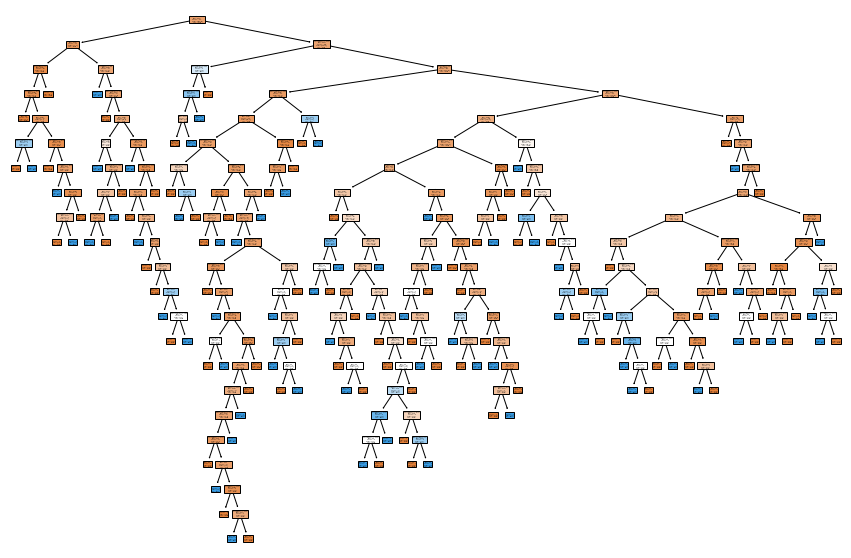

In [81]:
import matplotlib.pyplot as plt
from sklearn import tree
# Visualize the decision tree 
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        94
           1       0.23      0.23      0.23        26

    accuracy                           0.67       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.67      0.67      0.67       120


Confusion Matrix:
[[74 20]
 [20  6]]


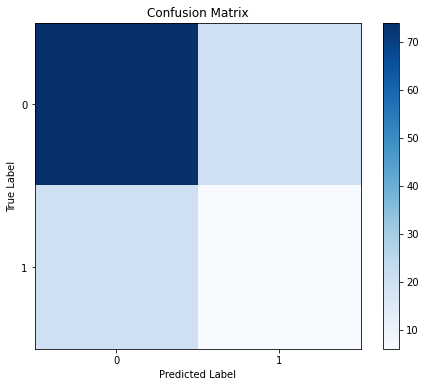

In [83]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = clf.classes_
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy of the model is at .67, which is pretty average. The precision recall and F1 score for class 0 is better than class 1.
